# t-Tests

***

In [1]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [2]:
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [3]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [4]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

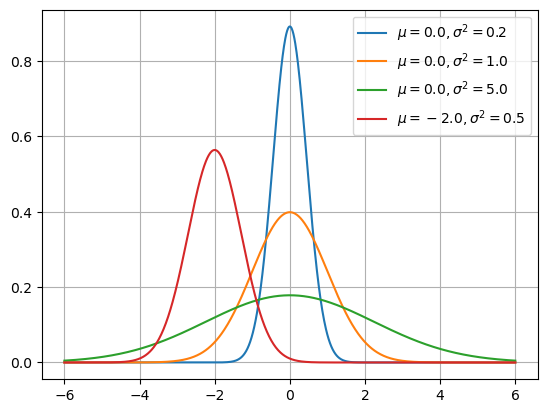

In [6]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

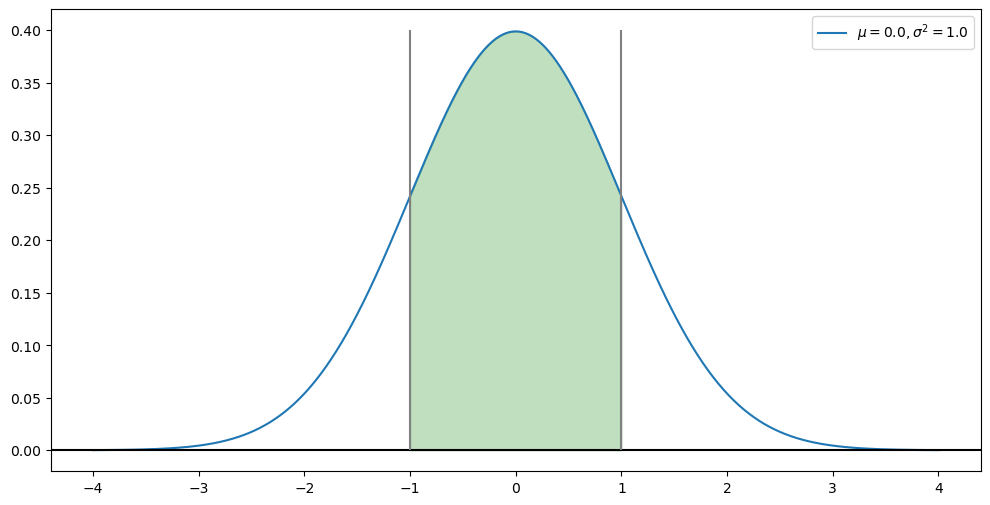

In [7]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values.
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis.
ax.axhline(0.0, color='black')

# Add vertical lines.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25)

# Add a legend.
ax.legend();

In [8]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


## Normal Data

***

In [9]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

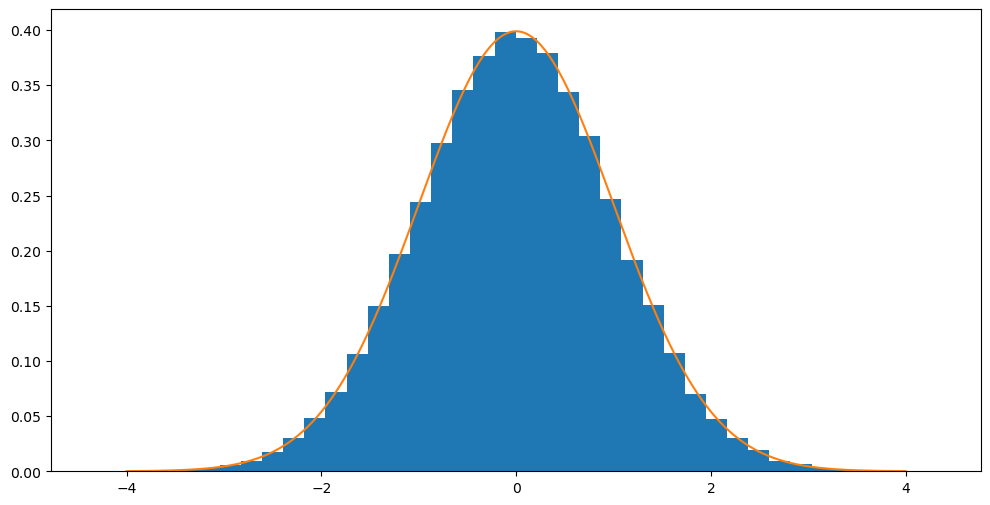

In [10]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [11]:
# Generate some random normal data.
random_data = np.random.standard_normal((10000, 25))

# Show.
random_data

array([[-0.06846479, -0.35297043,  1.0398276 , ..., -0.09405056,
        -0.20862705, -0.79163296],
       [-1.10868905,  1.42723978, -0.03864955, ..., -0.72853816,
        -1.22477471,  0.66431136],
       [ 0.73830523,  1.17688022, -0.8688743 , ..., -0.95642208,
         0.05510456, -1.60992346],
       ...,
       [-0.17642294, -0.46291057,  1.00218984, ...,  0.69403968,
        -0.75720921, -2.84518372],
       [ 1.20036689, -1.02452429, -1.21984336, ..., -0.17916829,
        -1.81029258, -0.20948605],
       [-0.27623742, -1.13129014, -0.44193585, ...,  2.99658928,
        -0.07515278, -1.09967777]])

In [12]:
# Mean across the rows.
random_data.mean(axis=1)

array([-0.05311997, -0.30897737, -0.04571335, ..., -0.50351335,
       -0.0805556 , -0.37881823])

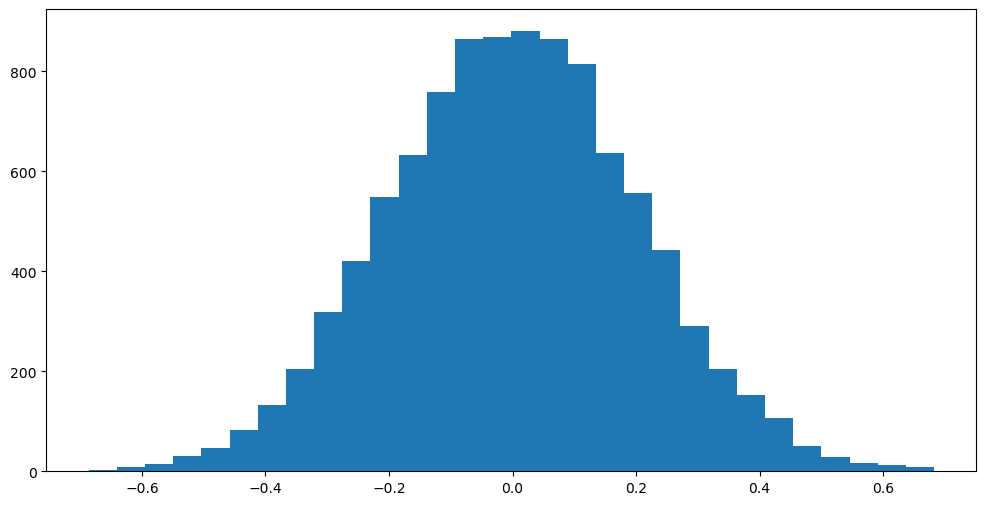

In [13]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

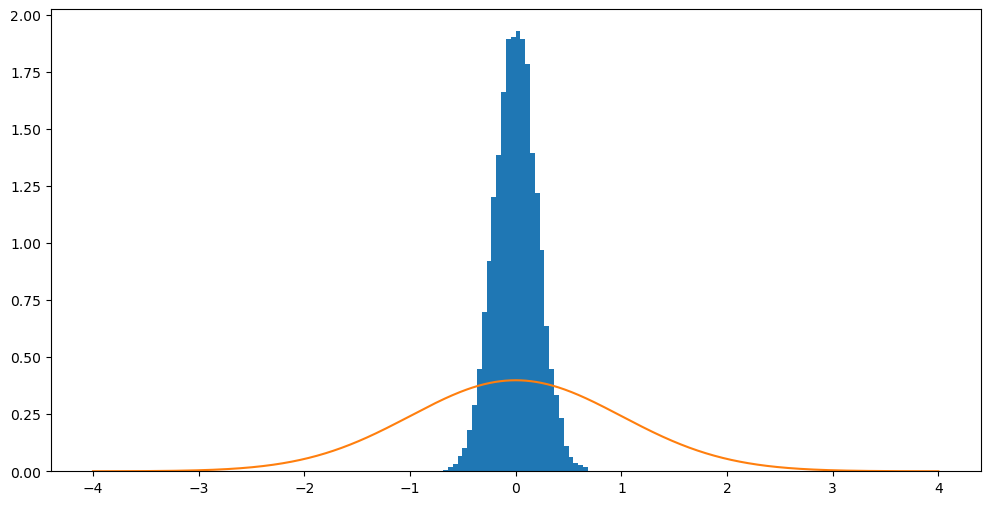

In [14]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

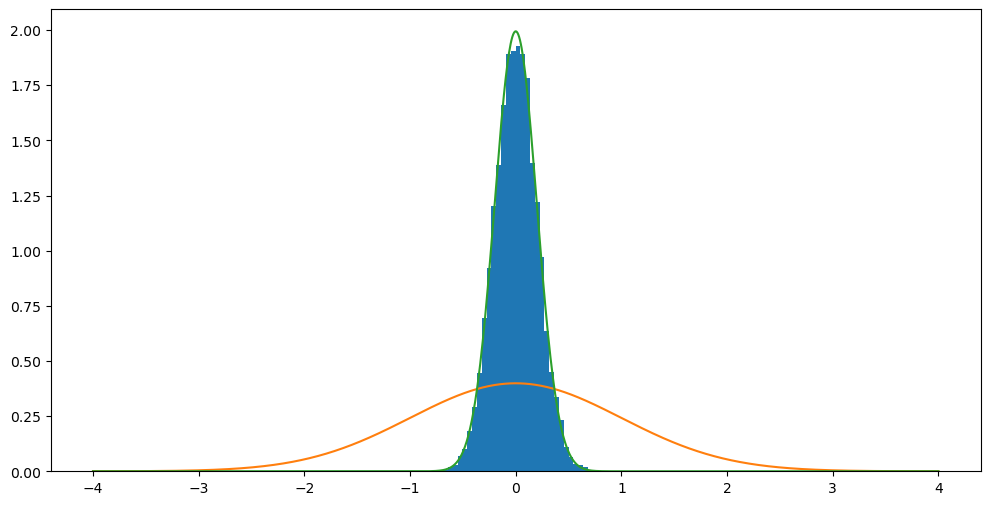

In [15]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot normal distribution with mu = 0.0 and sigma = 0.2.
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y);

## Random Normal

***

In [16]:
# Let's pick a random mean value.
random_mu = np.random.uniform(-3.0, 3.0)

# Show.
# random_mu

In [17]:
# Generate some random normal data with this unknown mu.
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show.
random_data

array([[-2.15711731, -5.01359992, -3.02961786, ..., -2.52408881,
        -2.95713943, -1.60006941],
       [-1.8551273 , -4.03250589, -2.497355  , ..., -2.1199476 ,
        -3.25761018, -1.6194198 ],
       [-4.11881981, -2.75958128, -2.9236651 , ..., -2.38526501,
        -2.79933125, -2.50775613],
       ...,
       [-3.17446238, -2.44460472, -3.41572771, ..., -1.77414777,
        -2.36968503, -5.82790485],
       [-2.74553943, -1.37994805, -3.36157389, ..., -2.70184725,
        -2.69121652, -4.34826976],
       [-2.78029229, -1.25155792, -1.22813822, ..., -2.70853839,
        -2.6906913 , -2.33098053]])

(array([9.34810498e-03, 7.47848398e-03, 1.30873470e-02, 3.92620409e-02,
        7.85240818e-02, 1.00959534e-01, 1.73874753e-01, 3.58967231e-01,
        6.52497727e-01, 9.81551022e-01, 1.24516758e+00, 1.46952210e+00,
        1.80231464e+00, 1.95749318e+00, 1.90514379e+00, 1.95375394e+00,
        1.59291709e+00, 1.29377773e+00, 1.03203079e+00, 7.92719302e-01,
        5.36581226e-01, 3.23444432e-01, 1.94440584e-01, 9.90899127e-02,
        4.30012829e-02, 2.24354519e-02, 1.30873470e-02, 1.86962100e-03,
        0.00000000e+00, 1.86962100e-03]),
 array([-3.67812046, -3.62463369, -3.57114691, -3.51766014, -3.46417336,
        -3.41068658, -3.35719981, -3.30371303, -3.25022625, -3.19673948,
        -3.1432527 , -3.08976592, -3.03627915, -2.98279237, -2.9293056 ,
        -2.87581882, -2.82233204, -2.76884527, -2.71535849, -2.66187171,
        -2.60838494, -2.55489816, -2.50141139, -2.44792461, -2.39443783,
        -2.34095106, -2.28746428, -2.2339775 , -2.18049073, -2.12700395,
        -2.07351

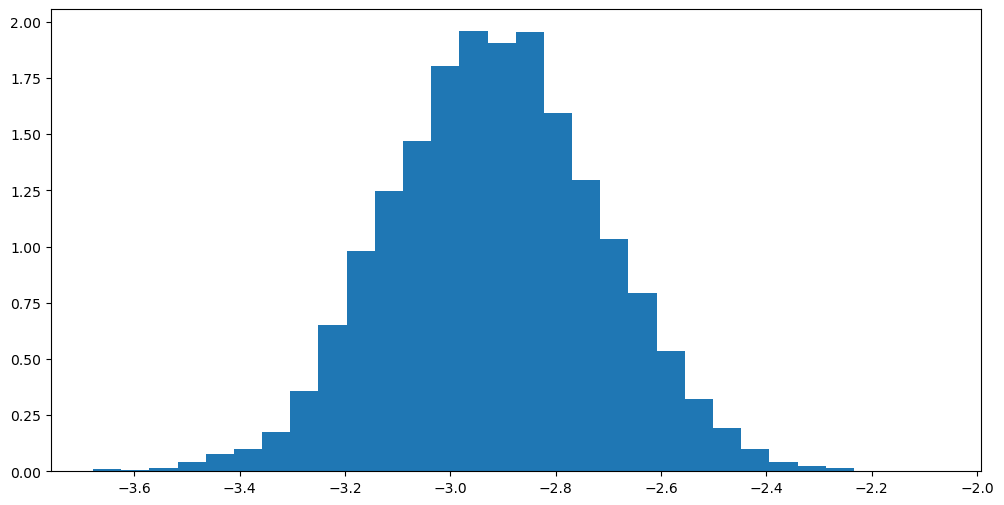

In [18]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [19]:
# Estimate random_mu from above histogram.
# Now look at the value.
random_mu

-2.918788975720296

In [20]:
# A random sample of size 50.
sample = np.random.normal(random_mu, 1.0, 50)

# Show.
sample

array([-2.22398476, -4.09502139, -2.51721276, -2.40959108, -2.81300136,
       -4.02138447, -2.63834436, -1.4040166 , -3.03176079, -3.99148026,
       -1.29691328, -1.53377984, -3.63483994, -2.42608452, -2.95010554,
       -5.05828521, -3.67945041, -3.92219276, -4.7529654 , -2.93452064,
       -1.70632104, -3.23116768, -3.00280499, -2.80256865, -4.35586867,
       -2.62617681, -2.84408499, -2.15636855, -4.07296902, -4.50591943,
       -5.1967069 , -1.9504321 , -3.44044525, -3.38311047, -1.05641924,
       -2.77195571, -1.1958432 , -1.86784339, -4.52916675, -3.19508098,
       -2.1894407 , -1.68029799, -1.97312304, -3.61829235, -1.18568357,
       -4.40852237, -1.75850901, -2.7833231 , -4.42244008, -4.08910931])

In [21]:
# Calculate the mean of the sample.
sample.mean()

-2.986698614819686

## Independent Samples t-test

***

In [22]:
# Load Iris.
df = pd.read_csv('data/iris.csv')

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
# Setosa petal length.
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [24]:
# Virginica petal length.
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [25]:
# t-test.
ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

## End